# The Data

In [1]:
import pandas as pd
import numpy as np

Dataset: https://www.kaggle.com/datasets/whenamancodes/data-science-fields-salary-categorization

In [2]:
salary_df = pd.read_csv("Data_Science_Fields_Salary_Categorization.csv")

In [3]:
salary_df.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50


In [4]:
salary_df.dtypes

Unnamed: 0               int64
Working_Year             int64
Designation             object
Experience              object
Employment_Status       object
Salary_In_Rupees        object
Employee_Location       object
Company_Location        object
Company_Size            object
Remote_Working_Ratio     int64
dtype: object

# Pre-Processing The Data

In [5]:
salary_df = salary_df.dropna(axis=0) # Remove null values

In [6]:
salary_df.drop_duplicates() # Remove duplicate values

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio
0,1,2020,Data Scientist,MI,FT,"6,352,272.00",DE,DE,L,0
1,2,2020,Machine Learning Scientist,SE,FT,"20,688,070.00",JP,JP,S,0
2,3,2020,Big Data Engineer,SE,FT,"8,674,985.00",GB,GB,M,50
3,4,2020,Product Data Analyst,MI,FT,"1,591,390.00",HN,HN,S,0
4,5,2020,Machine Learning Engineer,SE,FT,"11,935,425.00",US,US,L,50
...,...,...,...,...,...,...,...,...,...,...
602,603,2022,Data Engineer,SE,FT,"12,253,703.00",US,US,M,100
603,604,2022,Data Engineer,SE,FT,"10,025,757.00",US,US,M,100
604,605,2022,Data Analyst,SE,FT,"10,264,466.00",US,US,M,0
605,606,2022,Data Analyst,SE,FT,"11,935,425.00",US,US,M,100


In [7]:
# Convert the salary values into USD
salary_df['Salary_In_Rupees'] = salary_df['Salary_In_Rupees'].str.replace(',', '')
salary_df['Salary_In_Rupees'] = pd.to_numeric(salary_df['Salary_In_Rupees'])
salary_df['Salary_In_Dollars'] = salary_df['Salary_In_Rupees'] * 0.0122752

In [8]:
salary_df.head()

,Unnamed: 0,Working_Year,Designation,Experience,Employment_Status,Salary_In_Rupees,Employee_Location,Company_Location,Company_Size,Remote_Working_Ratio,Salary_In_Dollars
0,1,2020,Data Scientist,MI,FT,6352272.0,DE,DE,L,0,77975.409254
1,2,2020,Machine Learning Scientist,SE,FT,20688070.0,JP,JP,S,0,253950.196864
2,3,2020,Big Data Engineer,SE,FT,8674985.0,GB,GB,M,50,106487.175872
3,4,2020,Product Data Analyst,MI,FT,1591390.0,HN,HN,S,0,19534.630528
4,5,2020,Machine Learning Engineer,SE,FT,11935425.0,US,US,L,50,146509.728960


In [9]:
# Drop 'Salary_In_Rupees' column as it will not be used
salary_df = salary_df.drop('Salary_In_Rupees', axis=1)

# Data Understanding / Visualization

In [10]:
import seaborn as sns

Salary and Experience

<AxesSubplot:xlabel='Experience', ylabel='Salary_In_Dollars'>

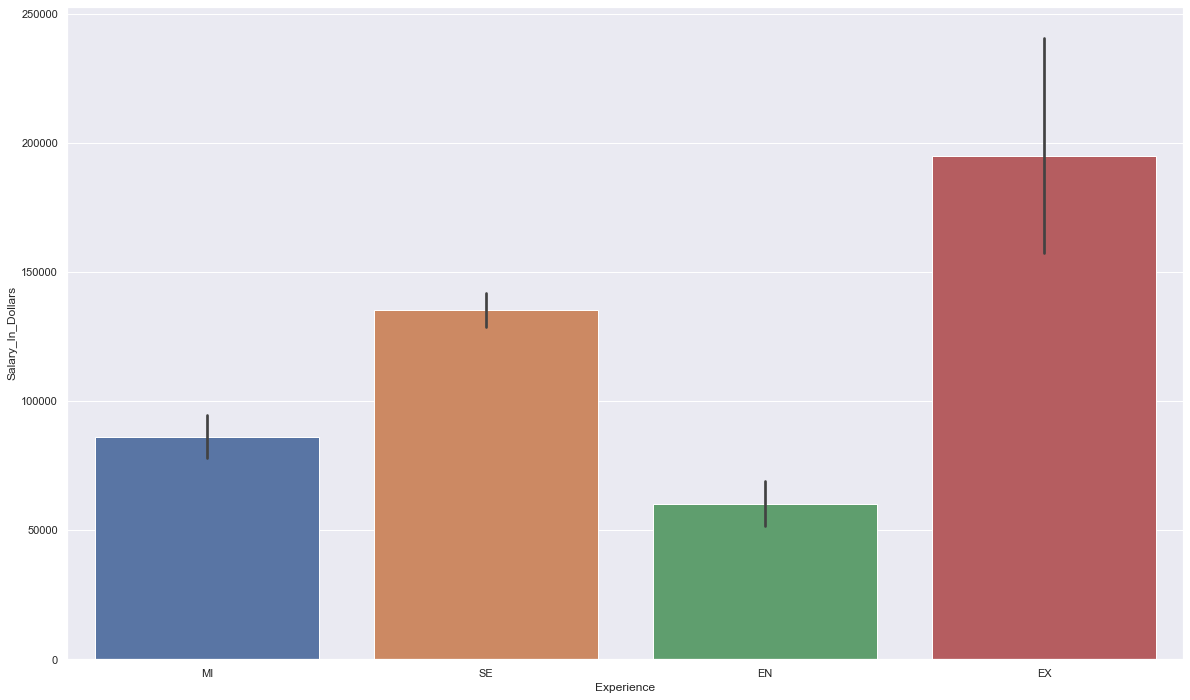

In [11]:
sns.set(rc={"figure.figsize":(20,12)})
sns.barplot(data=salary_df, y='Salary_In_Dollars', x='Experience')

Salary and Employment Status

<AxesSubplot:xlabel='Employment_Status', ylabel='Salary_In_Dollars'>

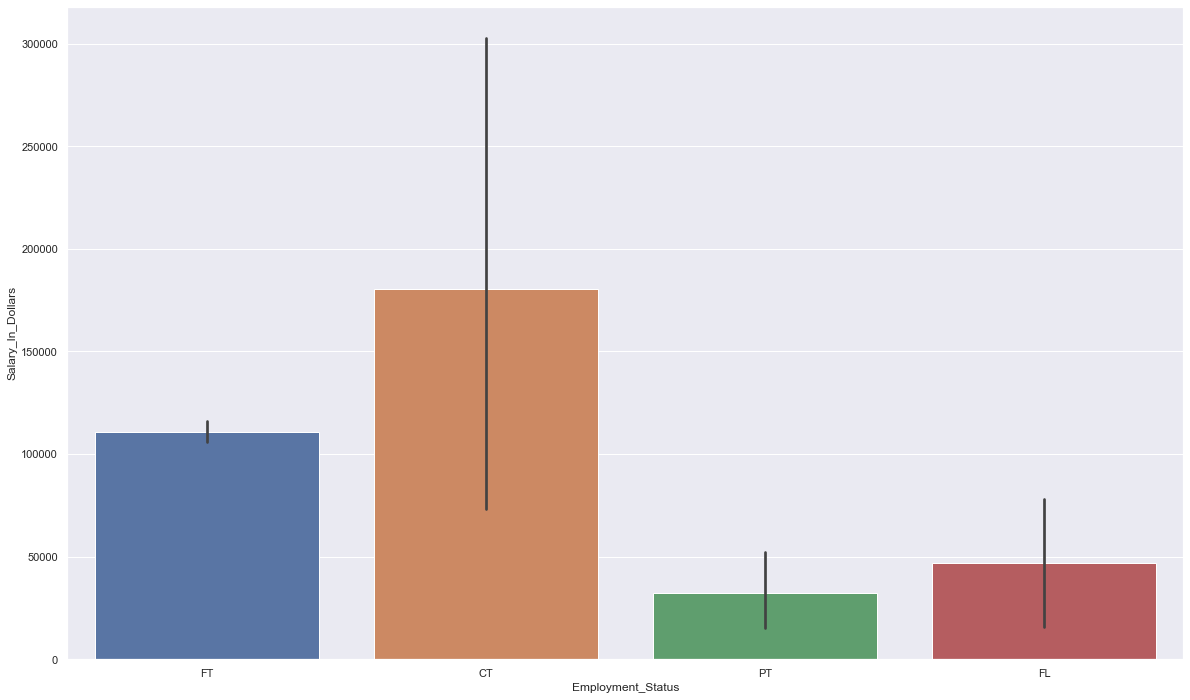

In [12]:
sns.set(rc={"figure.figsize":(20,12)})
sns.barplot(data=salary_df, y='Salary_In_Dollars', x='Employment_Status')

Salary and Company Location

<AxesSubplot:xlabel='Company_Location', ylabel='Salary_In_Dollars'>

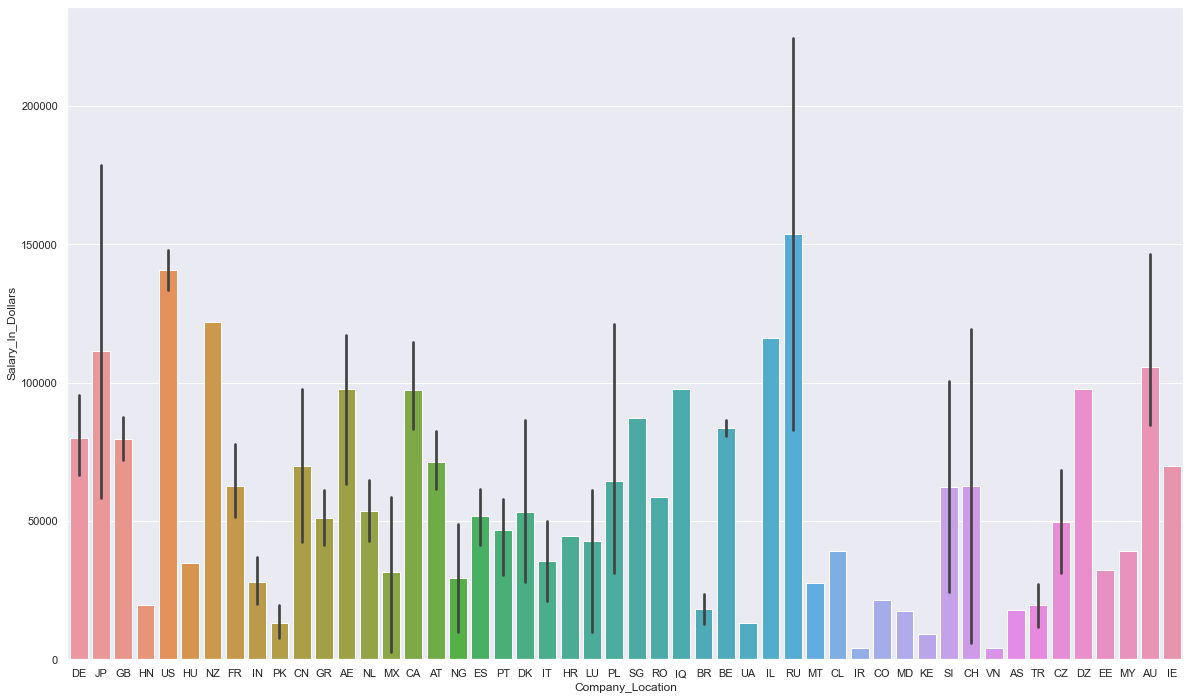

In [13]:
sns.set(rc={"figure.figsize":(20,12)})
sns.barplot(data=salary_df, y='Salary_In_Dollars', x='Company_Location')

Salary and Company Size

<AxesSubplot:xlabel='Company_Size', ylabel='Salary_In_Dollars'>

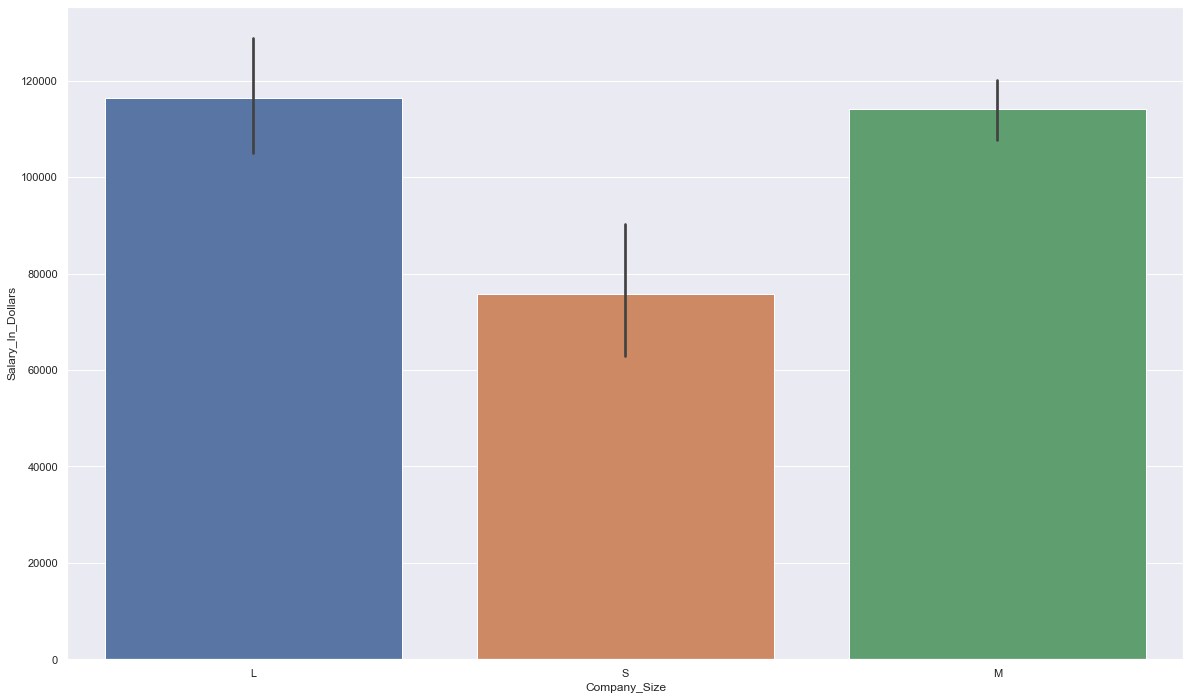

In [14]:
sns.set(rc={"figure.figsize":(20,12)})
sns.barplot(data=salary_df, y='Salary_In_Dollars', x='Company_Size')

# Modeling

In [15]:
model_df = salary_df

In [16]:
# Drop unccessary columns for modeling process
model_df = model_df.drop('Designation', axis=1)
model_df = model_df.drop('Employee_Location', axis=1)
model_df = model_df.drop('Remote_Working_Ratio', axis=1)
model_df = model_df.drop('Unnamed: 0', axis=1)

In [17]:
# If salary is under 6 figures, give value 0
model_df.loc[(model_df['Salary_In_Dollars'] >= 0) & (model_df['Salary_In_Dollars'] < 100000), 'Salary_Rating'] = 0

In [18]:
# If salary is over 6 figures, give value 1
model_df.loc[(model_df['Salary_In_Dollars'] >= 100000), 'Salary_Rating'] = 1

In [19]:
# Drop salary column
model_df = model_df.drop('Salary_In_Dollars', axis=1)

In [20]:
# Get columns ready for modeling
model_df = pd.get_dummies(model_df, columns = ['Working_Year', 'Experience', 'Employment_Status', 'Company_Location', 'Company_Size'], drop_first=True)

In [21]:
model_df.head()

,Salary_Rating,Working_Year_2021,Working_Year_2022,Experience_EX,Experience_MI,Experience_SE,Employment_Status_FL,Employment_Status_FT,Employment_Status_PT,Company_Location_AS,...,Company_Location_RO,Company_Location_RU,Company_Location_SG,Company_Location_SI,Company_Location_TR,Company_Location_UA,Company_Location_US,Company_Location_VN,Company_Size_M,Company_Size_S
0,0.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn import tree

In [23]:
X = model_df.drop(columns = ['Salary_Rating'])
y = model_df['Salary_Rating']

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3 ) #70% train, 30% test

In [25]:
clf = tree.DecisionTreeClassifier() # Instantiate Decision Tree class
clf = clf.fit(X_train, y_train) # Fit training data to the model
predicted = clf.predict(X_test)
predicted

array([1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1.])

In [26]:
clf.score(X_test, y_test)

0.7978142076502732

In [27]:
from sklearn import metrics
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79        95
         1.0       0.75      0.86      0.80        88

    accuracy                           0.80       183
   macro avg       0.80      0.80      0.80       183
weighted avg       0.81      0.80      0.80       183



In [28]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, predicted)

array([[70, 25],
       [12, 76]], dtype=int64)

In [29]:
import matplotlib.pyplot as plt

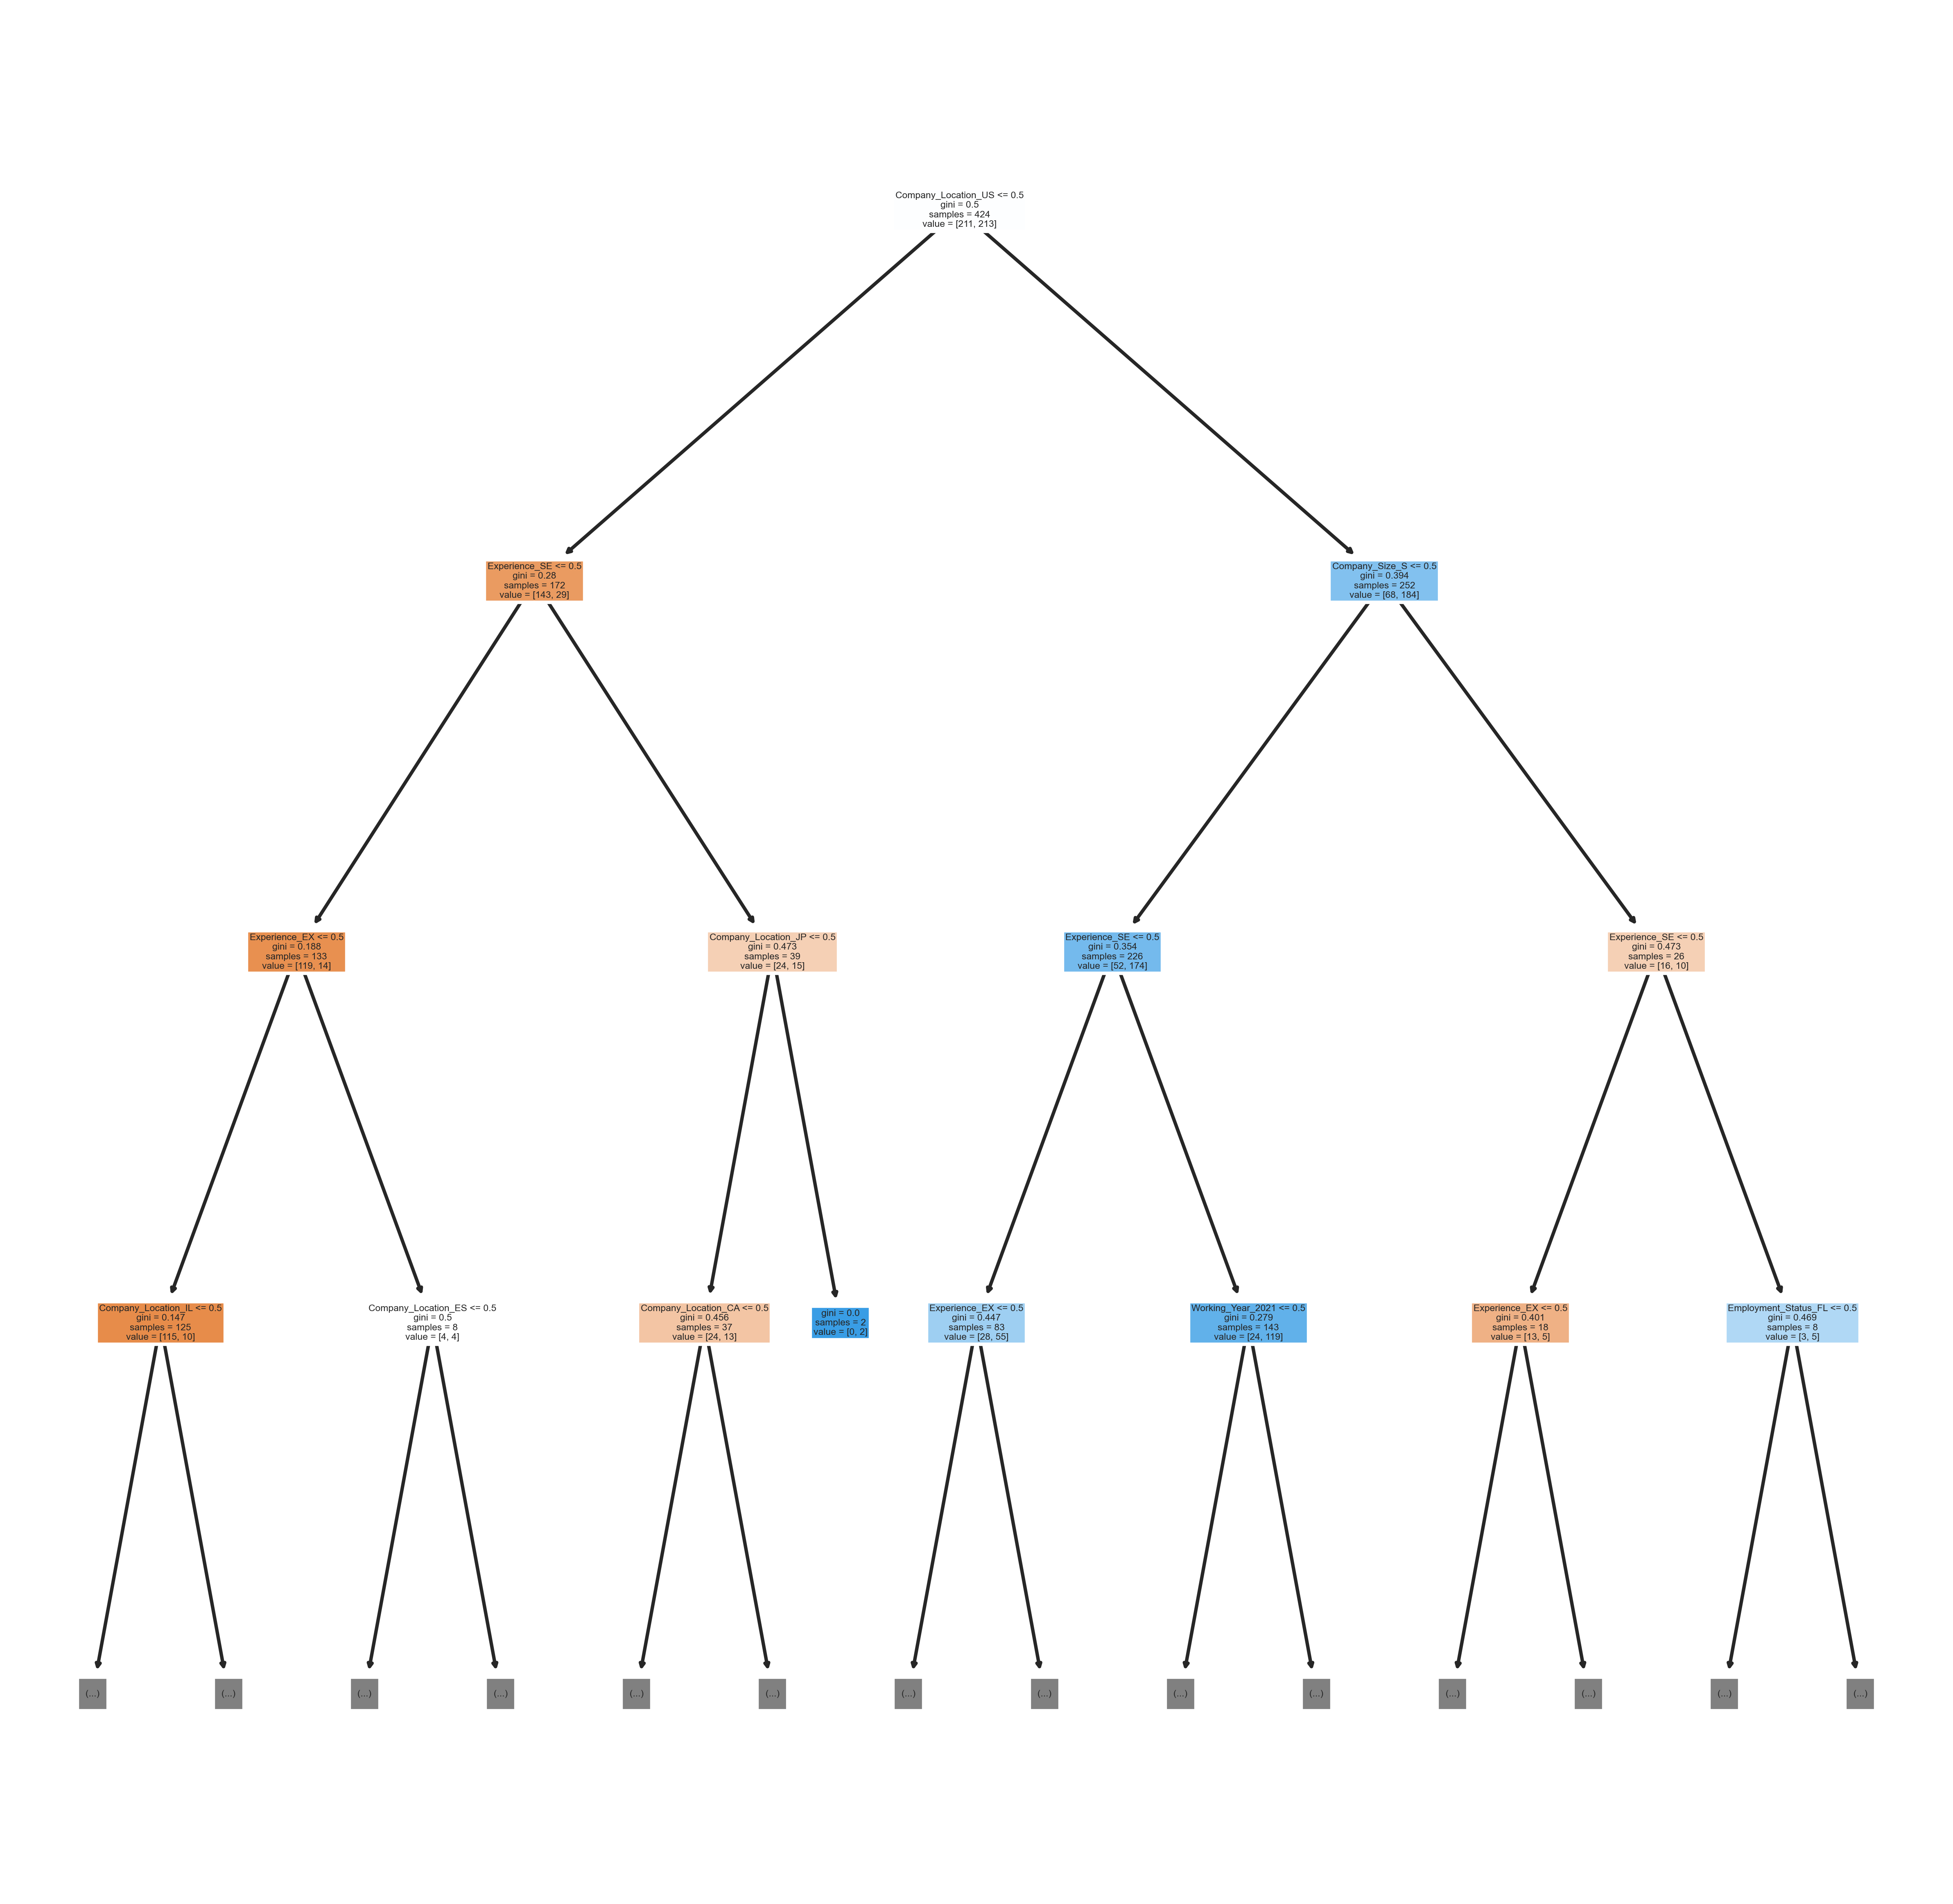

In [30]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (10,10), dpi=600)
tree.plot_tree(clf, max_depth = 3, feature_names = X.columns, filled=True)
plt.show()

In [31]:
fi = clf.feature_importances_ # Feature importance array
fi = pd.Series(data = fi, index = X.columns) # Convert to Pandas series for plotting
fi.sort_values(ascending=False, inplace=True) # Sort descending

C:\Users\HEJoh\AppData\Local\Temp\ipykernel_25500\3951147231.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


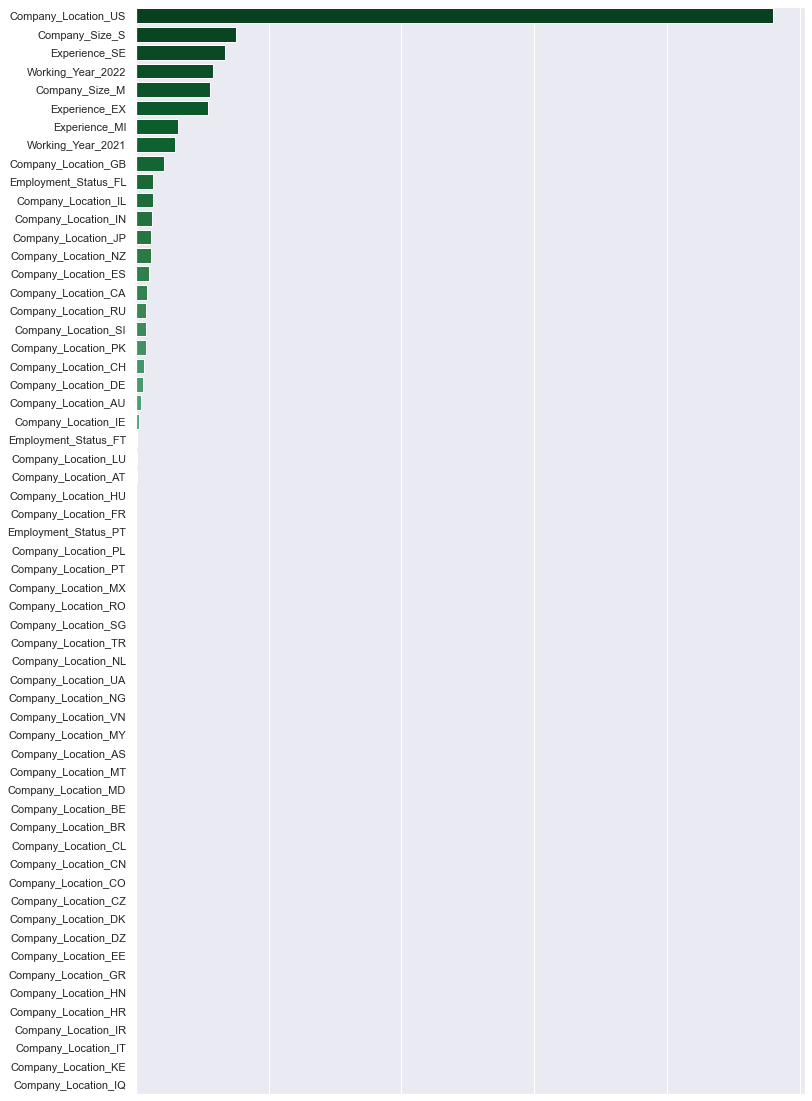

In [32]:
plt.figure(figsize=(12, 20))
chart = sns.barplot(x=fi, y=fi.index, palette=sns.color_palette("BuGn_r", n_colors=len(fi)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()